In [125]:
import os
import sys
from os.path import join
import pandas as pd
import numpy as np
import time
import itertools

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## read original source data

In [16]:
# read in dataframe
collab_df = pd.read_table('data/processed/collaborations.tsv', sep='\t')

In [17]:
collab_df.shape

(50153, 33)

In [18]:
collab_df.head()

,PUBLICATION_ID,PUBLICATION_TYPE,PUBLICATION_URI,PUBLISHED_DATE,TOTAL_AUTHORS,dst_DUID,dst_FIRST_NAME,dst_LAST_NAME,dst_MIDDLE_NAME,src_DUID,...,src_LAT,dst_ADDRESS,dst_CITY,dst_ZIP,dst_LON,dst_LAT,distance,duration,transportMode,crowDistance
0,0,Journal Article,https://scholars.duke.edu/individual/pub1000033,5/1/2013 12:00:00 AM,2,272070,Shelby,Reed,Derene,99016,...,36.003337,40 Duke Medicine Cir,DURHAM,27705,-78.935915,36.003337,0.0,0.0,walk,0.000000
1,1,Journal Article,https://scholars.duke.edu/individual/pub1000035,7/1/2013 12:00:00 AM,2,591120,John,Reynolds,Michael,119821,...,36.003337,40 Duke Medicine Cir,DURHAM,27705,-78.935915,36.003337,0.0,0.0,walk,0.000000
2,2,Journal Article,https://scholars.duke.edu/individual/pub1000091,10/3/2012 12:00:00 AM,2,98973,John,Alexander,Hunter Peel,314783,...,36.003337,40 Duke Medicine Cir,DURHAM,27705,-78.935915,36.003337,0.0,0.0,walk,0.000000
3,3,Journal Article,https://scholars.duke.edu/individual/pub1000099,11/1/2013 12:00:00 AM,2,449347,Endi,Wang,NaN,435364,...,36.003063,40 Duke Medicine Cir,DURHAM,27705,-78.936950,36.003063,0.0,0.0,walk,0.000000
4,4,Journal Article,https://scholars.duke.edu/individual/pub1000158,1/1/2013 12:00:00 AM,3,135843,Evan,Myers,Robert,373496,...,36.007164,40 Duke Medicine Cir,DURHAM,27705,-78.935105,36.003996,1110.0,883.0,walk,618.435335


### Instead of showing every time 2 people collaborated together, create a new table showing unique collaborations

In [19]:
uniqueCollabs = pd.read_table('data/processed/uniqueCollaborations.tsv', sep="\t")

In [20]:
uniqueCollabs.head()

,a1,a2,a1_BL_ID,a2_BL_ID,totalCollabs,collaborated,distance,duration
0,1080,15649,7508,8141,1,1,1016,758
1,1080,21813,7508,7508,45,1,0,0
2,1080,45508,7508,8141,3,1,1016,758
3,1080,50834,7508,7508,8,1,0,0
4,1080,54158,7508,7507,1,1,0,0


In [21]:
uniqueCollabs = uniqueCollabs[uniqueCollabs.distance>0]
print 'There are %s unique collaborations with a distance greater than 0' % (uniqueCollabs.collaborated.sum())

There are 7334 unique collaborations with a distance greater than 0


In [22]:
collab_df.columns

Index([u'PUBLICATION_ID', u'PUBLICATION_TYPE', u'PUBLICATION_URI',
       u'PUBLISHED_DATE', u'TOTAL_AUTHORS', u'dst_DUID', u'dst_FIRST_NAME',
       u'dst_LAST_NAME', u'dst_MIDDLE_NAME', u'src_DUID', u'src_FIRST_NAME',
       u'src_LAST_NAME', u'src_MIDDLE_NAME', u'src_OrgBFR', u'dst_OrgBFR',
       u'src_DUKE_NUMBER', u'dst_DUKE_NUMBER', u'src_BL_ID', u'dst_BL_ID',
       u'src_ADDRESS', u'src_CITY', u'src_ZIP', u'src_LON', u'src_LAT',
       u'dst_ADDRESS', u'dst_CITY', u'dst_ZIP', u'dst_LON', u'dst_LAT',
       u'distance', u'duration', u'transportMode', u'crowDistance'],
      dtype='object')

In [23]:
def getBuildingLat(bl_id):
    # get the latitude of the specified building
    if bl_id in collab_df.src_BL_ID.values:
        #thisLat = 1
        thisLat = collab_df.loc[collab_df.src_BL_ID == bl_id, 'src_LAT'].iloc[0]
    else:
        #thisLat = 0
        thisLat = collab_df.loc[collab_df.dst_BL_ID == bl_id, 'dst_LAT'].iloc[0]

    return thisLat

def getBuildingLon(bl_id):
    # get the Longitude of the specified building
    if bl_id in collab_df.src_BL_ID.values:
        #thisLon = 1
        thisLon = collab_df.loc[collab_df.src_BL_ID == bl_id, 'src_LON'].iloc[0]
    else:
        #thisLon = 0
        thisLon = collab_df.loc[collab_df.dst_BL_ID == bl_id, 'dst_LON'].iloc[0]

    return thisLon

In [25]:
uniqueCollabs['a1_LAT'] = uniqueCollabs['a1_BL_ID'].apply(getBuildingLat)
uniqueCollabs['a1_LON'] = uniqueCollabs['a1_BL_ID'].apply(getBuildingLon)
uniqueCollabs['a2_LAT'] = uniqueCollabs['a2_BL_ID'].apply(getBuildingLat)
uniqueCollabs['a2_LON'] = uniqueCollabs['a2_BL_ID'].apply(getBuildingLon)

In [26]:
uniqueCollabs.head()

,a1,a2,a1_BL_ID,a2_BL_ID,totalCollabs,collaborated,distance,duration,a2_LAT,a2_LON,a1_LAT,a1_LON
0,1080,15649,7508,8141,1,1,1016,758,36.009519,-78.941601,36.003337,-78.935915
2,1080,45508,7508,8141,3,1,1016,758,36.009519,-78.941601,36.003337,-78.935915
5,1080,62399,7508,7516,9,1,1110,883,36.007164,-78.940748,36.003337,-78.935915
6,1080,83945,7508,7516,2,1,1110,883,36.007164,-78.940748,36.003337,-78.935915
7,1080,95795,7508,8141,1,1,1016,758,36.009519,-78.941601,36.003337,-78.935915


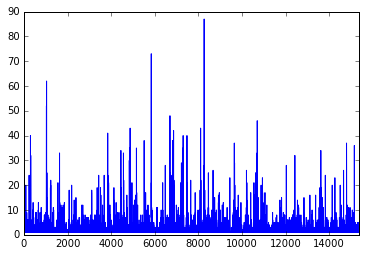

In [27]:
uniqueCollabs.totalCollabs.plot()

### Filter out locations that are far outside campus/downtown durham
from looking at an early visualization of all data, there is one site in particular that is pretty far south and east. Remove any collaboration with a source or destination at this remote site for the purposes of the visualization. 

In [28]:
# most southernly
print collab_df['dst_LAT'].min()

# most easternly
print collab_df['dst_LON'].max()

35.9220293709
-78.8691705465


In [29]:
# Find the Address of this location
remoteAddress = collab_df.loc[collab_df.dst_LAT == collab_df.dst_LAT.min(), 'dst_ADDRESS'].iloc[0]
remoteAddress

'19 TW Alexander Dr'

In [30]:
# Find the BL_ID of this location
remote_BL_ID = collab_df.loc[collab_df.dst_LAT == collab_df.dst_LAT.min(), 'dst_BL_ID'].iloc[0]
remote_BL_ID

8329

In [31]:
# remove this collaboration from the dataset
uniqueCollabs = uniqueCollabs[uniqueCollabs.a1_BL_ID != remote_BL_ID]
uniqueCollabs = uniqueCollabs[uniqueCollabs.a2_BL_ID != remote_BL_ID]

uniqueCollabs.shape

(7272, 12)

### Write the filtered vis data to a file


In [32]:
uniqueCollabs.to_csv('vis/vis_collaborations.tsv', sep='\t', index=False)

# Prep the circos data

### building circos data

In [33]:
uniqueCollabs.head()

,a1,a2,a1_BL_ID,a2_BL_ID,totalCollabs,collaborated,distance,duration,a2_LAT,a2_LON,a1_LAT,a1_LON
0,1080,15649,7508,8141,1,1,1016,758,36.009519,-78.941601,36.003337,-78.935915
2,1080,45508,7508,8141,3,1,1016,758,36.009519,-78.941601,36.003337,-78.935915
5,1080,62399,7508,7516,9,1,1110,883,36.007164,-78.940748,36.003337,-78.935915
6,1080,83945,7508,7516,2,1,1110,883,36.007164,-78.940748,36.003337,-78.935915
7,1080,95795,7508,8141,1,1,1016,758,36.009519,-78.941601,36.003337,-78.935915


In [36]:
a1_bldgs = np.unique(uniqueCollabs.a1_BL_ID)
a2_bldgs = np.unique(uniqueCollabs.a2_BL_ID)

# unique list of buildings in the vis collaboration dataframe (i.e. buildings with collaboration distance > 0)
unique_bldgs = np.unique(np.concatenate([a1_bldgs, a2_bldgs], axis=0))

# start the building collaborations dataframe
bl_collabs = pd.DataFrame({'BL_ID': unique_bldgs})

#### get the total number of collaborations per building

In [148]:
def getTotalCollabsByBuilding(bl_id):
    uniqeCollabsInThisBuilding = 0
    
    thisBuildingCollabs = uniqueCollabs.loc[(uniqueCollabs.a1_BL_ID == bl_id) | (uniqueCollabs.a2_BL_ID == bl_id), :]
    uniqeCollabsInThisBuilding = thisBuildingCollabs.shape[0]
    
    return int(uniqeCollabsInThisBuilding)

In [149]:
bl_collabs['totalCollabs'] = bl_collabs.BL_ID.apply(getTotalCollabsByBuilding)

#### read in table linking building IDs to building names

In [46]:
bldgNames = pd.read_table('data/processed/buildingNames.tsv', sep='\t')

In [49]:
unique_bldgs[:10]

array([7201, 7202, 7224, 7251, 7261, 7501, 7506, 7507, 7508, 7512])

#### write the karyotype file

In [150]:
f = open('vis/circos/buildings/buildings_karyotype.txt', 'w')
for bl_id in unique_bldgs:
    
    # get building name
    this_bl_name = bldgNames.loc[bldgNames.BL_ID == bl_id, 'NAME'].iloc[0]
    
    # get total collaborations for this building
    this_bl_totalCollabs = str(bl_collabs.loc[bl_collabs.BL_ID == bl_id, 'totalCollabs'].iloc[0])
    
    # write this "chromosome" (i.e. building) to the karotype file
    this_chr = '\t'.join(['chr', '-', str(bl_id), this_bl_name, '0', this_bl_totalCollabs, 'lpurple'])
    f.write(this_chr+'\n')
f.close()

#### Make the links representing total collaborations between buildings

In [151]:
# class to store the positional count for each building
class Building:
    def __init__(self, id):
        self.ID = id
        self.currentPosition = 0
    
    def getCurrentPosition(self):
        return self.currentPosition
    
    # increment the current position by set amount
    def setNewPosition(self, position):
        self.currentPosition = position

        
# functions for getting and setting the current position of the building objects
def getCurrentPosition(BL_ID):
    for b in bl_objects:
        if b.ID == BL_ID:
            return int(b.getCurrentPosition())
        
def setCurrentPosition(BL_ID, posIncrement):
    for b in bl_objects:
        if b.ID == BL_ID:
            b.setNewPosition(posIncrement)
            
# function for tabulating total number of unique collaborations between buildings
def getTotalCollabs(b1, b2):
    total_collabs = 0
    b1_b2_collabs = uniqueCollabs.loc[(uniqueCollabs.a1_BL_ID == b1) & (uniqueCollabs.a2_BL_ID==b2), :]
    b2_b1_collabs = uniqueCollabs.loc[(uniqueCollabs.a1_BL_ID == b2) & (uniqueCollabs.a2_BL_ID==b1), :]
    total_collabs = b1_b2_collabs.shape[0] + b2_b1_collabs.shape[0]
    return total_collabs

In [152]:
# turn each building into an object, store all objects in list
bl_objects = []
for bl_id in unique_bldgs: 
    bl_objects.append(Building(bl_id))


f = open('vis/circos/buildings/building_links.txt', 'w')

# loop through the unique collaborations
test = np.array([7201, 7508])
for b1, b2 in itertools.combinations(unique_bldgs, 2):
        
    # get the total number of unique collaborations that came from these 2 buildings
    totalCollabs = getTotalCollabs(b1, b2)
    if totalCollabs > 0:
        # find current positions
        b1_start = int(getCurrentPosition(b1))
        b2_start = int(getCurrentPosition(b2))

        # get end positions, set new positions for the building class
        b1_end = int(b1_start + totalCollabs)
        b2_end = int(b2_start + totalCollabs)
        setCurrentPosition(b1, b1_end)
        setCurrentPosition(b2, b2_end)

        # write link
        this_link = '\t'.join([str(b1), str(b1_start), str(b1_end), str(b2), str(b2_start), str(b2_end)])
        f.write(this_link + '\n')
f.close()

In [141]:
getCurrentPosition(7201)

2

In [114]:
unique_bldgs

array([7201, 7202, 7224, 7251, 7261, 7501, 7506, 7507, 7508, 7512, 7513,
       7514, 7515, 7516, 7530, 7531, 7534, 7540, 7545, 7548, 7549, 7550,
       7560, 7576, 7579, 7593, 7705, 7706, 7709, 7710, 7735, 7738, 7739,
       7747, 7749, 7753, 7754, 7756, 7758, 7759, 7760, 7765, 7776, 8084,
       8116, 8141, 8166, 8239, 8304])

In [111]:
uniqueCollabs.head()

,a1,a2,a1_BL_ID,a2_BL_ID,totalCollabs,collaborated,distance,duration,a2_LAT,a2_LON,a1_LAT,a1_LON
0,1080,15649,7508,8141,1,1,1016,758,36.009519,-78.941601,36.003337,-78.935915
2,1080,45508,7508,8141,3,1,1016,758,36.009519,-78.941601,36.003337,-78.935915
5,1080,62399,7508,7516,9,1,1110,883,36.007164,-78.940748,36.003337,-78.935915
6,1080,83945,7508,7516,2,1,1110,883,36.007164,-78.940748,36.003337,-78.935915
7,1080,95795,7508,8141,1,1,1016,758,36.009519,-78.941601,36.003337,-78.935915


In [65]:
a.currentPosition = 10

In [66]:
a.currentPosition

10

In [13]:
collab_df.head()

NameError: name 'collab_df' is not defined